In [1]:
#importing libraries
import tensorflow as tf #deep learning lib
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt #plotting our plots

In [2]:
import keras #for using keras preprocessing and other functions

In [3]:
#input size
img_size = 255
batches = 32
channels = 3


In [4]:
#creating batches for train , val , test
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/cotton-disease-dataset/Cotton Disease/train",
    shuffle = True,
    image_size =(img_size,img_size),
    batch_size = batches,
    
)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/cotton-disease-dataset/Cotton Disease/test",
    shuffle = True,
    image_size =(img_size,img_size),
    batch_size = batches,
    
)

valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/cotton-disease-dataset/Cotton Disease/val",
    shuffle = True,
    image_size =(img_size,img_size),
    batch_size = batches,
    
)



Found 1951 files belonging to 4 classes.


2022-05-12 03:03:06.306191: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-12 03:03:06.428720: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-12 03:03:06.429462: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-12 03:03:06.434854: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 106 files belonging to 4 classes.
Found 253 files belonging to 4 classes.


In [5]:
len(training_ds),len(valid_ds),len(testing_ds)

(61, 8, 4)

### optimizing

In [6]:
train_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
valid_ds = valid_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
test_ds = testing_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE )

### Data Augmentation

In [7]:
data_augmentations = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(img_size,img_size),
    layers.experimental.preprocessing.Rescaling(1.0/img_size),
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

### Creating model

In [8]:
inputshape = (batches ,img_size , img_size , 3)
classes = 4

plant_model = keras.models.Sequential([
    data_augmentations,
    layers.Conv2D(filters = 32 , kernel_size = (3 , 3),activation = 'relu' , input_shape = inputshape),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(filters = 64 , kernel_size = (3,3)  , activation ='relu'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(filters = 128 , kernel_size = (3,3) , activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(filters = 256, kernel_size = (3,3) , activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2)),
    
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(units = 128 , activation = 'relu'),
    layers.Dropout(0.1),
    layers.Dense(units = 128 , activation = 'relu'),
    layers.Dropout(0.25),
    layers.Dense(units = classes , activation = 'softmax'),
    
])

plant_model.build(input_shape = inputshape)

In [9]:
plant_model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])

### Model params

In [10]:
plant_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 255, 255, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 253, 253, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 126, 126, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 124, 124, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (32, 30, 30, 128)        

### Training 

In [11]:
EPOCHS = 300

In [12]:
#saving models everytime we get a better val_accuracy
checkpoint_filepath = 'weights.{epoch:02d}-{val_loss:.2f}.h5'

In [13]:
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [14]:
history = plant_model.fit(
    train_ds,
    callbacks = [model_checkpoint_callback],
    epochs = EPOCHS,
    verbose = 1,
    validation_data = valid_ds
)

Epoch 1/300


2022-05-12 03:03:11.690224: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-12 03:03:20.887729: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


61/61 [==============================] - 21s 75ms/step - loss: 1.2727 - accuracy: 0.4311 - val_loss: 1.2039 - val_accuracy: 0.4980
Epoch 2/300
61/61 [==============================] - 3s 42ms/step - loss: 1.1040 - accuracy: 0.5085 - val_loss: 1.0190 - val_accuracy: 0.5652
Epoch 3/300
61/61 [==============================] - 3s 41ms/step - loss: 0.9735 - accuracy: 0.5925 - val_loss: 0.8496 - val_accuracy: 0.6522
Epoch 4/300
61/61 [==============================] - 3s 43ms/step - loss: 0.7877 - accuracy: 0.6802 - val_loss: 0.5490 - val_accuracy: 0.7984
Epoch 5/300
61/61 [==============================] - 3s 41ms/step - loss: 0.6671 - accuracy: 0.7324 - val_loss: 0.3921 - val_accuracy: 0.8379
Epoch 6/300
61/61 [==============================] - 3s 42ms/step - loss: 0.5817 - accuracy: 0.7678 - val_loss: 0.3681 - val_accuracy: 0.8617
Epoch 7/300
61/61 [==============================] - 3s 41ms/step - loss: 0.5440 - accuracy: 0.7673 - val_loss: 0.4971 - val_accuracy: 0.8024
Epoch 8/300
61/61

In [15]:
scores = plant_model.evaluate(test_ds)

4/4 [==============================] - 2s 51ms/step - loss: 0.0254 - accuracy: 0.9906


In [16]:
scores

[0.02543722093105316, 0.9905660152435303]

In [17]:
history

In [18]:
history.params

{'verbose': 1, 'epochs': 300, 'steps': 61}

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plotting 

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

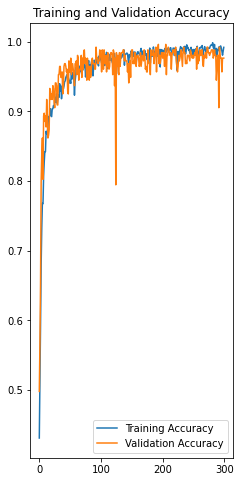

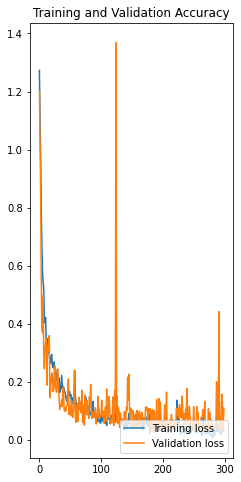

In [21]:
plt.figure(figsize = (8,8))
plt.subplot( 1 , 2 , 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize = (8,8))
plt.subplot( 1 , 2 , 1)
plt.plot(range(EPOCHS), loss, label = 'Training loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation loss')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.show()